In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import os
os.chdir('../scripts')
from functions import r2
os.chdir('../notebooks')

In [2]:
# Read in data
df = pd.read_csv('../data/OLDER FOR DELETE/kaggle/energy_dataset.csv')
df_lag = pd.read_csv('../data/clean/df_clean_lag.csv', index_col=0, parse_dates=True)

In [3]:
# Format index col for kaggle dataset
df.time = df.time.apply(lambda x: x[:13])
df.time = pd.to_datetime(df.time, format='%Y-%m-%d %H')
df.set_index('time', inplace=True)

### Evaluation of Kaggle Dataset R-squared v. Reindexed R-squared

In [4]:
print('Original Kaggle r-squared:', r2(df['price day ahead'], df['price actual']))
print('Reindex r-squared:', r2(df_lag.loc[:'2018', 'price_day_ahead'], df_lag.loc[:'2018', 'price_actual']))

Original Kaggle r-squared: 0.5360515929821794
Reindex r-squared: 0.9609890064499244


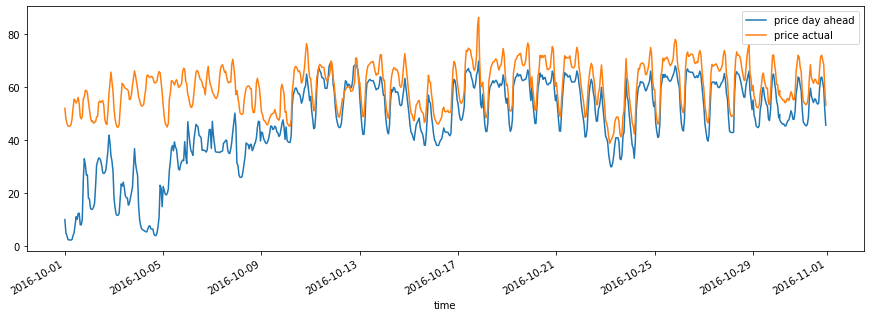

In [5]:
df.loc['2016-10', ['price day ahead', 'price actual']].plot(figsize=(15,5));

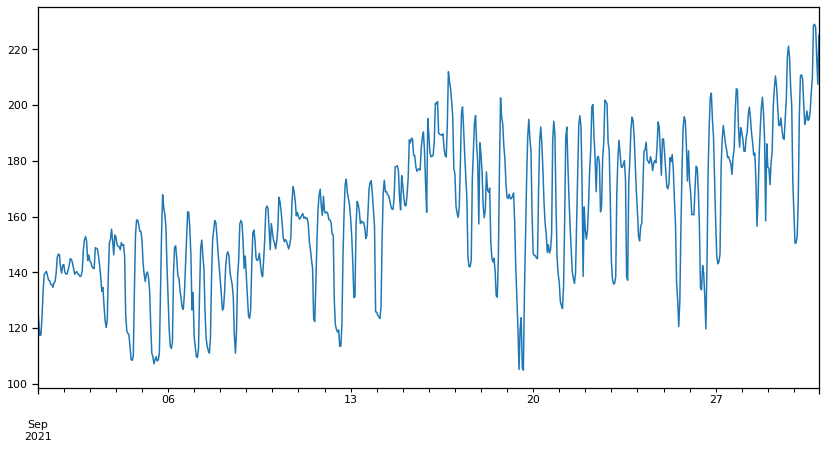

In [37]:
sns.set_context('notebook')
df_lag.loc['2021-9', 'price_actual'].plot(figsize=(14,7));


ValueError: Wedge sizes 'x' must be non negative values

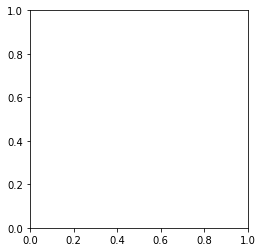

In [6]:
# Get Price cols
price_df = df_lag.filter(regex='price').drop(columns='price_actual')

# Get price means
price_means = price_df.mean()
colors = sns.color_palette('pastel')[0:15]

plt.pie(price_means, labels=price_means.index, colors = colors, autopct='%.0f%%')

In [16]:
price_means

price_intraday_tech         -9.780908e-07
price_PBF_tech               1.903064e+00
price_rt_tech                2.718398e-01
price_intraday_market       -1.334817e-02
price_day_ahead              5.614551e+01
price_upward_reserve         9.173057e-02
price_sec_reserve            7.000440e-01
price_measured_imbalances    2.302647e-01
price_imbalances_net        -6.568466e-02
price_capacity_payment       2.621310e+00
price_P0146_balance          9.073585e-03
price_generic_failure        0.000000e+00
price_interupt_service       1.123516e+00
price_power_factor          -6.183115e-02
price_balance_failure       -2.795335e-02
dtype: float64

In [13]:
len(price_means)

15

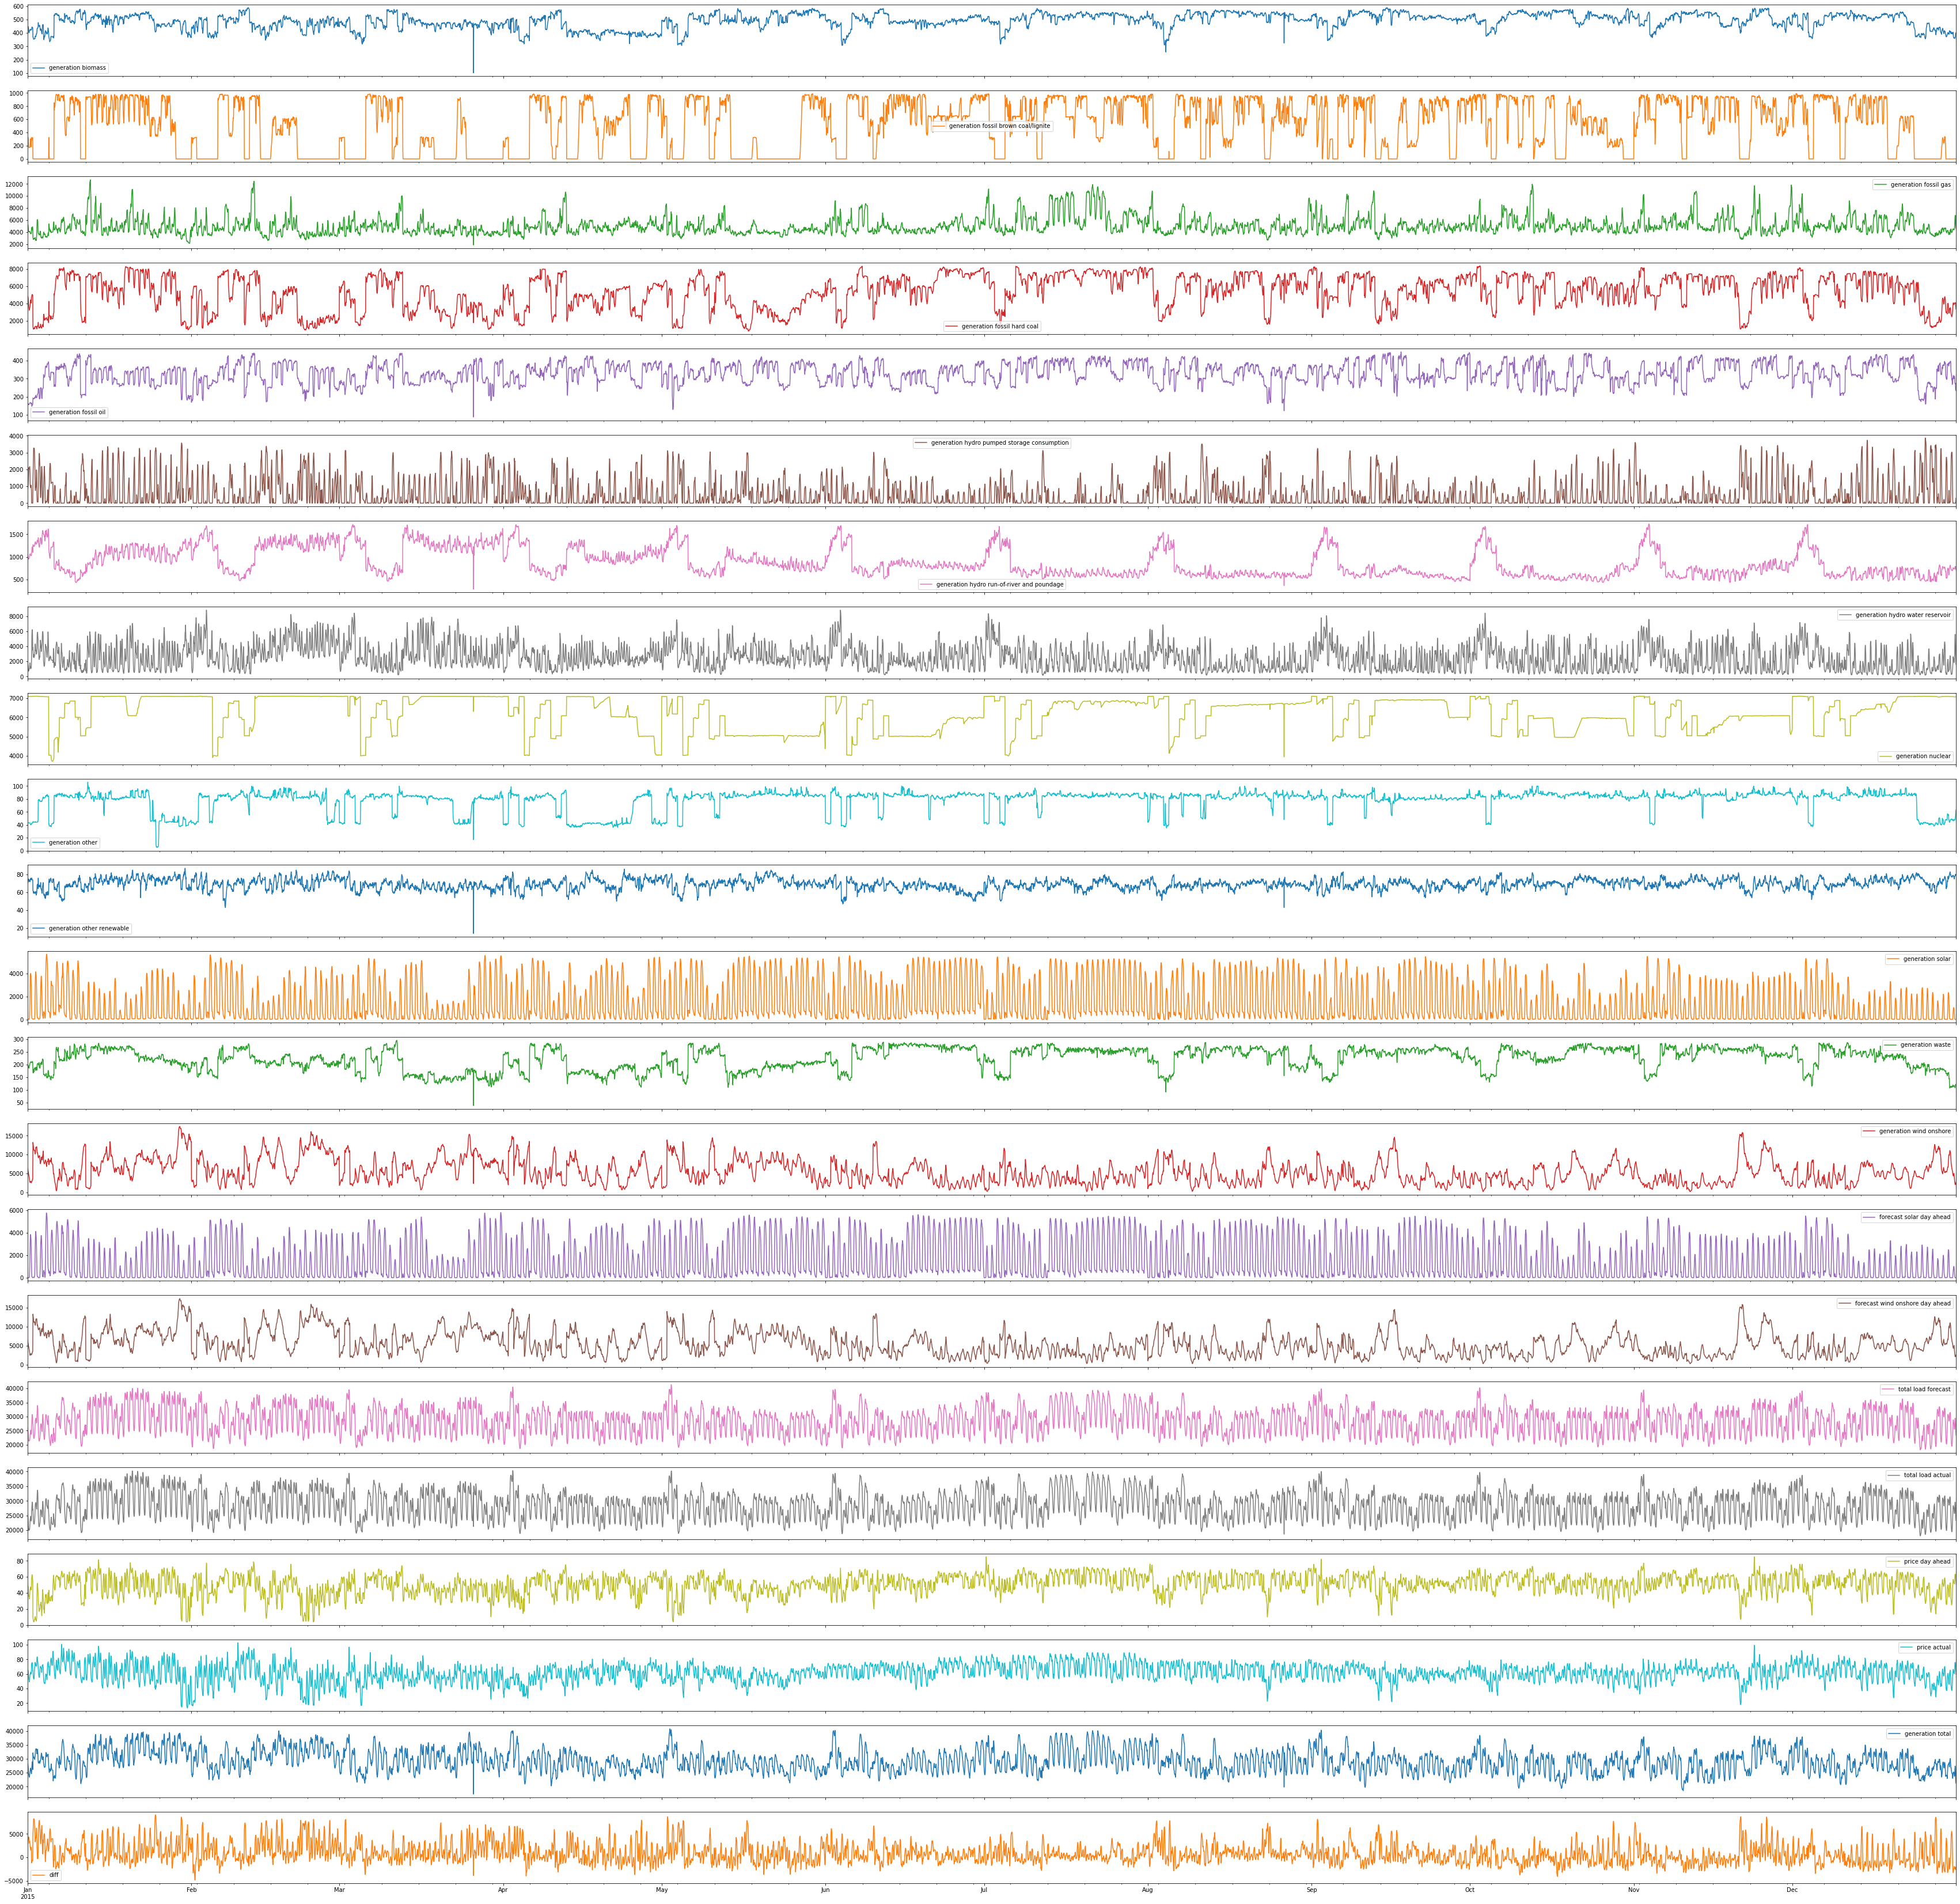

In [3]:
# Plot first year
yr_2015 = energy.loc['2015-01-01 00:00:00':'2015-12-31 23:00:00'].copy()
yr_2015.plot(subplots = True, figsize=(60,60));

## Overall Energy Generation by Year
___

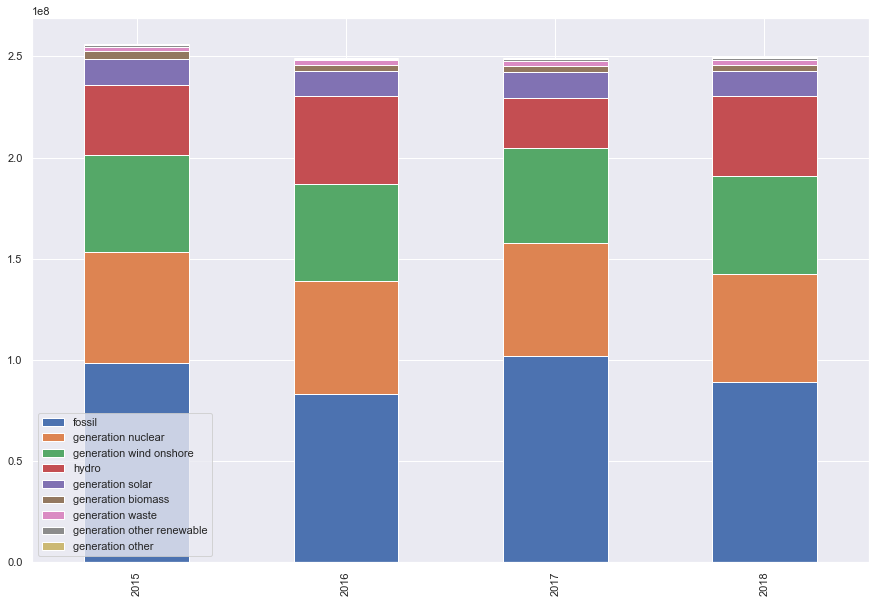

In [4]:
generation = energy.iloc[:, :14].copy()
fossil = ['generation fossil brown coal/lignite',
                                   'generation fossil gas',
                                   'generation fossil hard coal',
                                   'generation fossil oil',]
hydro = ['generation hydro pumped storage consumption',
                                  'generation hydro run-of-river and poundage',
                                  'generation hydro water reservoir']
generation['fossil'] = generation[fossil].sum(axis=1)
generation['hydro'] = generation[hydro].sum(axis=1)
generation.drop(columns = fossil+hydro, inplace=True)
generation_by_year = generation.groupby(by=generation.index.year).sum()
order = generation_by_year.sum(axis=0).sort_values(ascending=False).index
sns.set_theme()
generation_by_year[order].plot(kind='bar', stacked=True, figsize=(15,10));


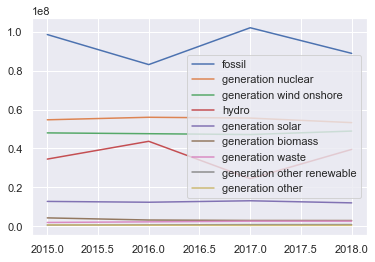

In [5]:
generation_by_year[order].plot();

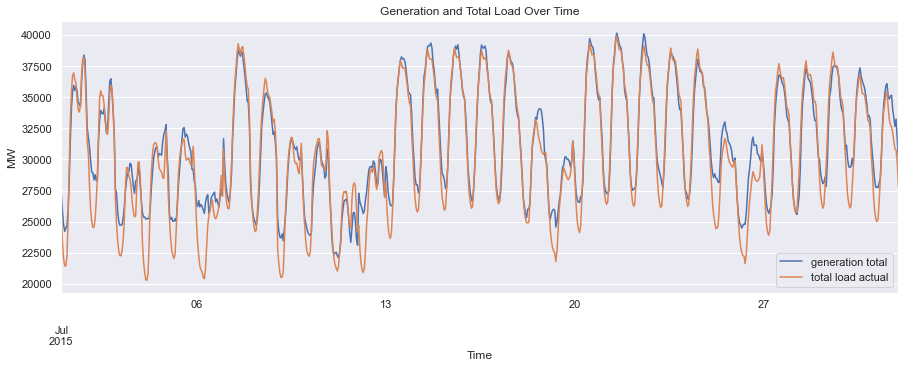

In [6]:
energy.loc['2015-07','generation total'].plot(figsize=(15,5), legend=True);
energy.loc['2015-07','total load actual'].plot(figsize=(15,5), legend=True);
plt.title('Generation and Total Load Over Time');
plt.xlabel('Time');
plt.ylabel('MW');

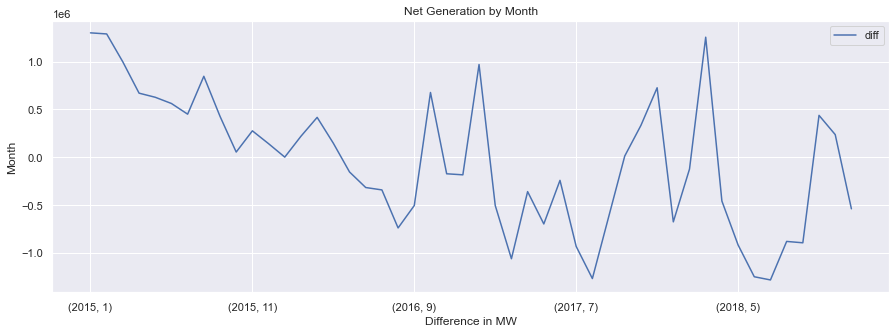

In [7]:
energy.groupby(by=[energy.index.year, energy.index.month]).sum()['diff'].plot(figsize=(15,5), legend=True);
plt.title('Net Generation by Month');
plt.ylabel('Month');
plt.xlabel('Difference in MW');

## Energy Generation By Source
___

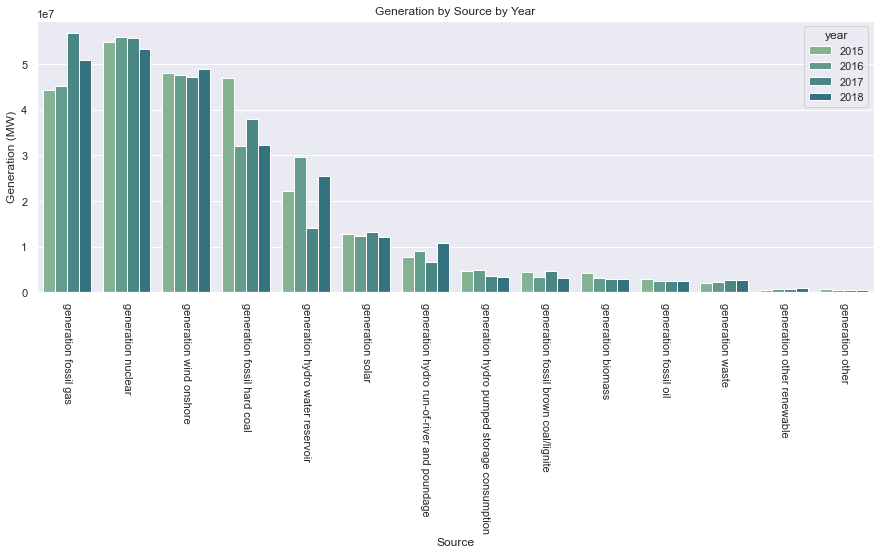

In [8]:
energy_by_year = energy.groupby(by=energy.index.year).sum().iloc[:,:14].reset_index().rename(columns={'index':'year'})
chart = energy_by_year.melt('year', var_name = 'Source', value_name = 'Generation (MW)')
chart.sort_values(by=['Generation (MW)', 'year'], ascending=False, inplace=True)

colors = sns.color_palette("crest");
plt.figure(figsize=(15,5));
sns.barplot(x='Source',
            y='Generation (MW)',
            hue='year',
            data=chart,
            palette=colors);
plt.xticks(rotation = -90);
plt.title('Generation by Source by Year');


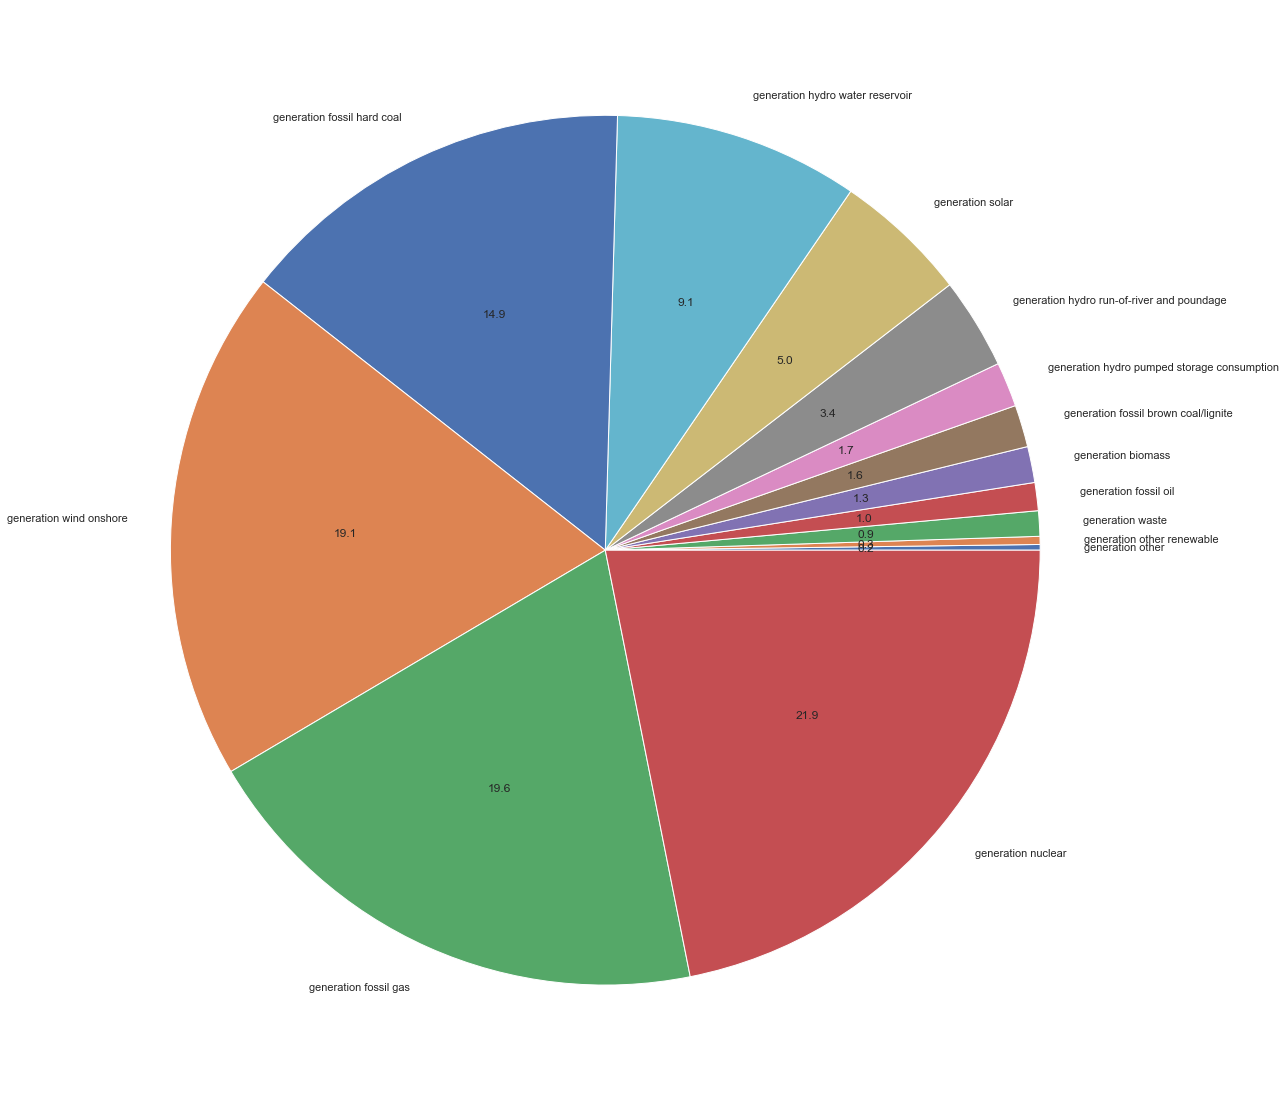

In [9]:
energy_sorted=energy.sum()[:14].sort_values()
plt.figure(figsize=(20,20))
plt.pie(energy_sorted, labels=energy_sorted.index, autopct='%.1f');

## Correlations
___

In [10]:
energy.corr()

generation biomass  \
generation biomass                                     1.000000   
generation fossil brown coal/lignite                   0.229757   
generation fossil gas                                 -0.020829   
generation fossil hard coal                            0.433264   
generation fossil oil                                  0.458333   
generation hydro pumped storage consumption           -0.045156   
generation hydro run-of-river and poundage            -0.285921   
generation hydro water reservoir                      -0.033862   
generation nuclear                                    -0.023993   
generation other                                       0.657971   
generation other renewable                            -0.564251   
generation solar                                      -0.005042   
generation waste                                      -0.348861   
generation wind onshore                               -0.069374   
forecast solar day ahead                              -0.008736   
forecast wind onshore day ahead                       -0.072220   
total load forecast                                    0.086276   
total load actual                                      0.084187   
price day ahead                                        0.109721   
price actual                                           0.143076   
generation total                                       0.124039   
diff                                                   0.051899   

                                             generation fossil brown coal/lignite  \
generation biomass                                                       0.229757   
generation fossil brown coal/lignite                                     1.000000   
generation fossil gas                                                    0.500410   
generation fossil hard coal                                              0.768880   
generation fossil oil                                                    0.314873   
generation hydro pumped storage consumption                             -0.324311   
generation hydro run-of-river and poundage                              -0.525307   
generation hydro water reservoir                                        -0.229051   
generation nuclear                                                      -0.008470   
generation other                                                         0.097367   
generation other renewable                                               0.104149   
generation solar                                                         0.040130   
generation waste                                                         0.282718   
generation wind onshore                                                 -0.434350   
forecast solar day ahead                                                 0.041982   
forecast wind onshore day ahead                                         -0.436035   
total load forecast                                                      0.279580   
total load actual                                                        0.281219   
price day ahead                                                          0.568483   
price actual                                                             0.364287   
generation total                                                         0.189425   
diff                                                                    -0.191228   

                                             generation fossil gas  \
generation biomass                                       -0.020829   
generation fossil brown coal/lignite                      0.500410   
generation fossil gas                                     1.000000   
generation fossil hard coal                               0.542379   
generation fossil oil                                     0.311016   
generation hydro pumped storage consumption              -0.420777   
generation hydro run-of-river and poundage               

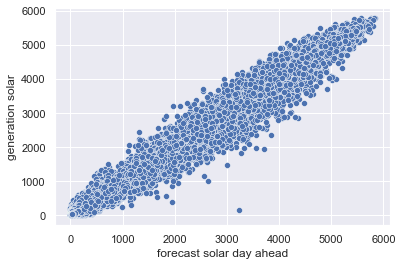

In [11]:
sns.scatterplot(data=energy, y='generation solar', x='forecast solar day ahead');

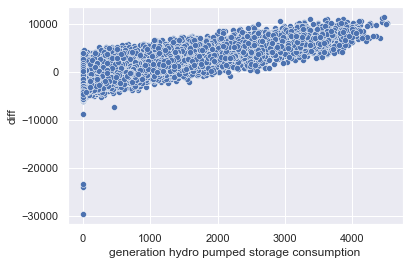

In [12]:
sns.scatterplot(x='generation hydro pumped storage consumption',y='diff', data=energy);

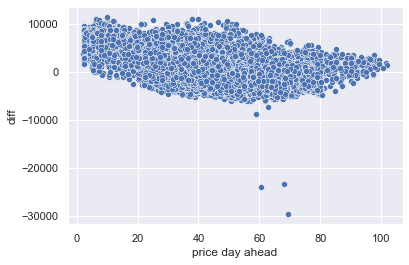

In [13]:
sns.scatterplot(x='price day ahead', y='diff', data=energy, legend=True);

## Difference in Load Forecast and Actual Load
___

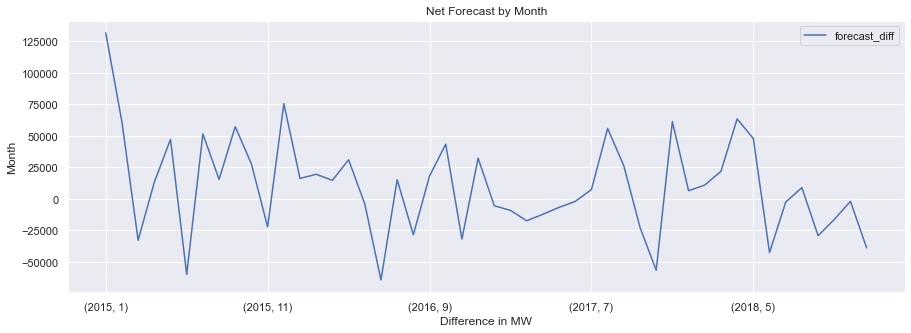

In [14]:
energy['forecast_diff'] = energy['total load forecast'] - energy['total load actual']
energy.groupby(by=[energy.index.year, energy.index.month]).sum()['forecast_diff'].plot(figsize=(15,5), legend=True);
plt.title('Net Forecast by Month');
plt.ylabel('Month');
plt.xlabel('Difference in MW');

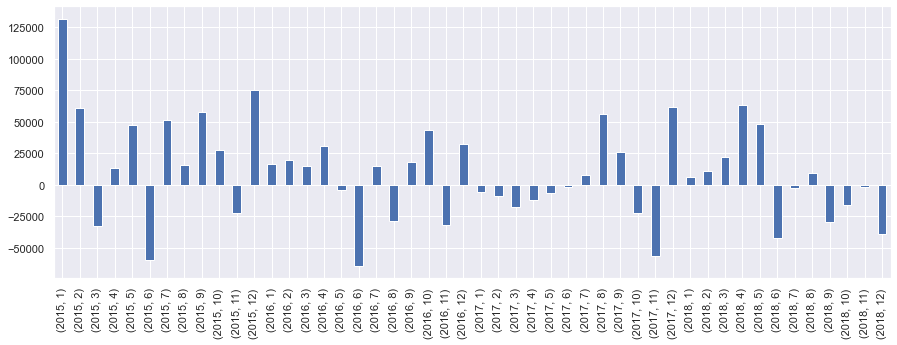

In [15]:
energy.groupby(by=[energy.index.year, energy.index.month]).sum()['forecast_diff'].plot(kind='bar', figsize=(15,5));

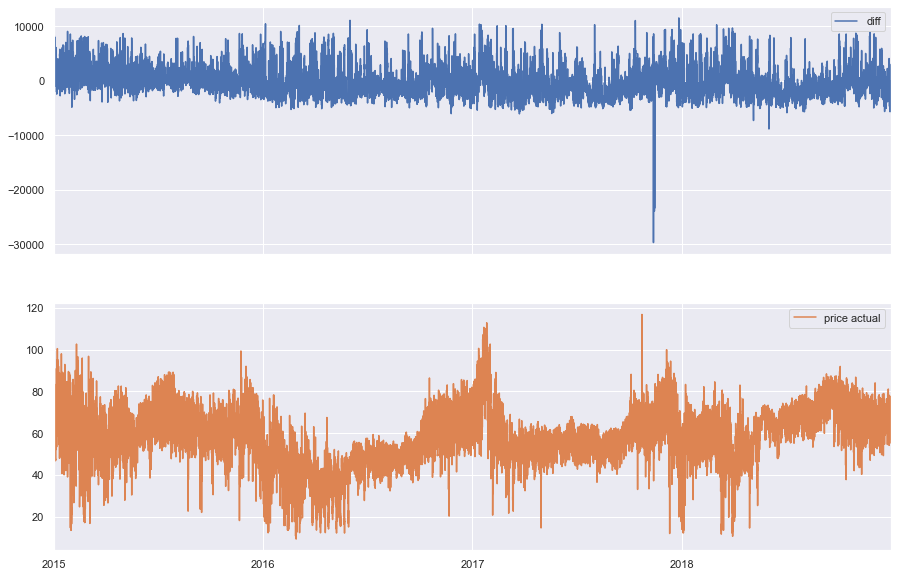

In [16]:
energy[['diff', 'price actual']].plot(subplots=True,figsize=(15,10));

In [17]:
energy.loc[abs(energy['diff'])>energy['total load actual']*.6]

generation biomass  generation fossil brown coal/lignite  \
2017-11-12 21:00:00               358.0                                 634.0   
2017-11-14 12:00:00               371.0                                 943.0   
2017-11-14 19:00:00               379.0                                 979.5   

                     generation fossil gas  generation fossil hard coal  \
2017-11-12 21:00:00                 6899.0                       5910.5   
2017-11-14 12:00:00                10064.0                       6694.0   
2017-11-14 19:00:00                12336.0                       7051.0   

                     generation fossil oil  \
2017-11-12 21:00:00                  352.5   
2017-11-14 12:00:00                  324.5   
2017-11-14 19:00:00                  339.5   

                     generation hydro pumped storage consumption  \
2017-11-12 21:00:00                                          0.0   
2017-11-14 12:00:00                                          0.0   
2017-11-14 19:00:00                                          0.0   

                     generation hydro run-of-river and poundage  \
2017-11-12 21:00:00                                      1214.0   
2017-11-14 12:00:00                                       505.0   
2017-11-14 19:00:00                                       577.5   

                     generation hydro water reservoir  generation nuclear  \
2017-11-12 21:00:00                            1424.5              7087.5   
2017-11-14 12:00:00                             397.0              5047.5   
2017-11-14 19:00:00                            2505.0              5048.5   

                     generation other  ...  generation wind onshore  \
2017-11-12 21:00:00              49.5  ...                   8434.0   
2017-11-14 12:00:00              11.0  ...                   7593.5   
2017-11-14 19:00:00              11.5  ...                   5744.0   

                     forecast solar day ahead  \
2017-11-12 21:00:00                      36.0   
2017-11-14 12:00:00                    4325.0   
2017-11-14 19:00:00                     128.0   

                     forecast wind onshore day ahead  total load forecast  \
2017-11-12 21:00:00                           8536.0              36671.0   
2017-11-14 12:00:00                           7561.0              33805.0   
2017-11-14 19:00:00                           5679.0              35592.0   

                     total load actual  price day ahead  price actual  \
2017-11-12 21:00:00            36562.0            69.48         67.66   
2017-11-14 12:00:00            33970.0            60.53         66.17   
2017-11-14 19:00:00            35709.0            68.05         75.45   

                     generation total     diff  forecast_diff  
2017-11-12 21:00:00            6899.0 -29663.0          109.0  
2017-11-14 12:00:00           10064.0 -23906.0         -165.0  
2017-11-14 19:00:00           12336.0 -23373.0         -117.0  

[3 rows x 23 columns]

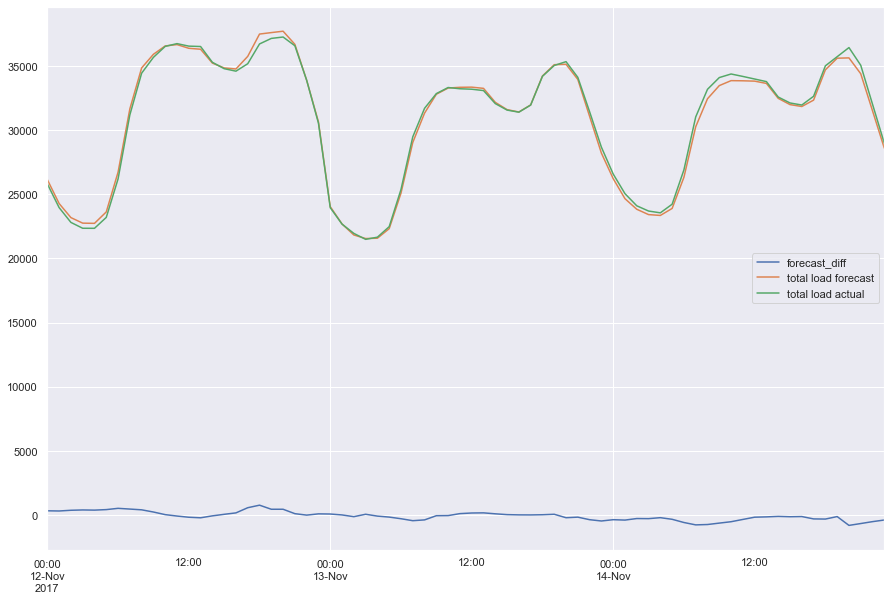

In [18]:
energy.loc['2017-11-12':'2017-11-14', ['forecast_diff', 'total load forecast', 'total load actual']].plot(figsize=(15,10));

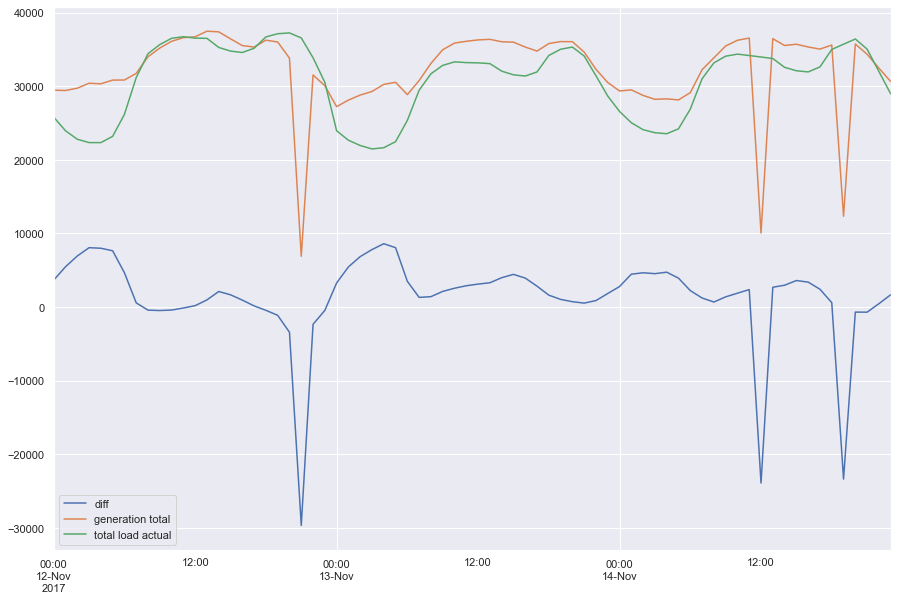

In [19]:
energy.loc['2017-11-12':'2017-11-14', ['diff', 'generation total', 'total load actual']].plot(figsize=(15,10));

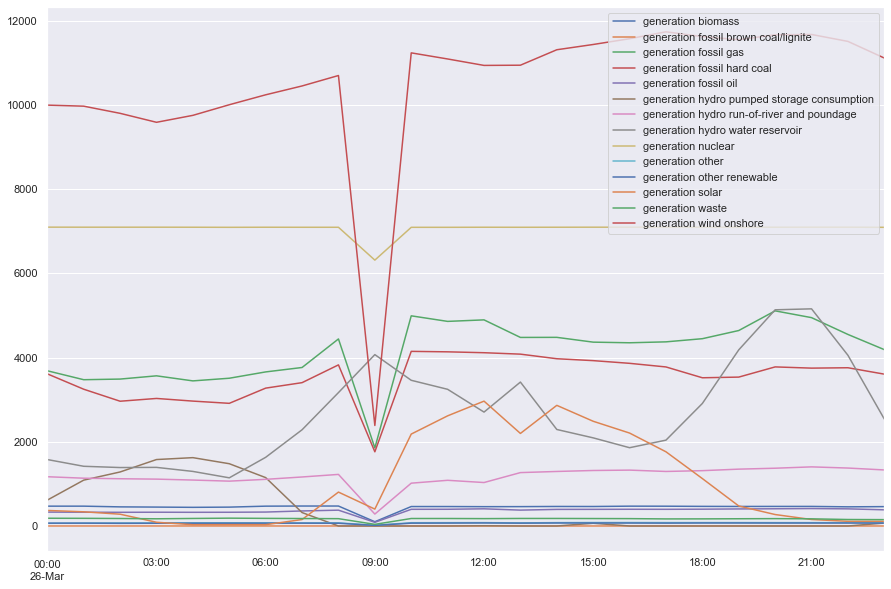

In [20]:
energy.loc['2015-03-26'].iloc[:,:14].plot(figsize=(15,10));

## Daily Average Price Curve
___

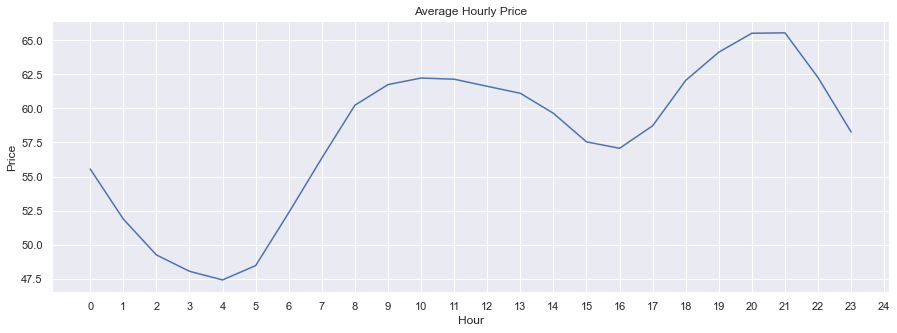

In [21]:
energy.groupby(by=energy.index.hour).mean()['price actual'].plot(figsize=(15,5), xticks=range(25));
plt.title('Average Hourly Price');
plt.xlabel('Hour');
plt.ylabel('Price');

## Trends by Column
___

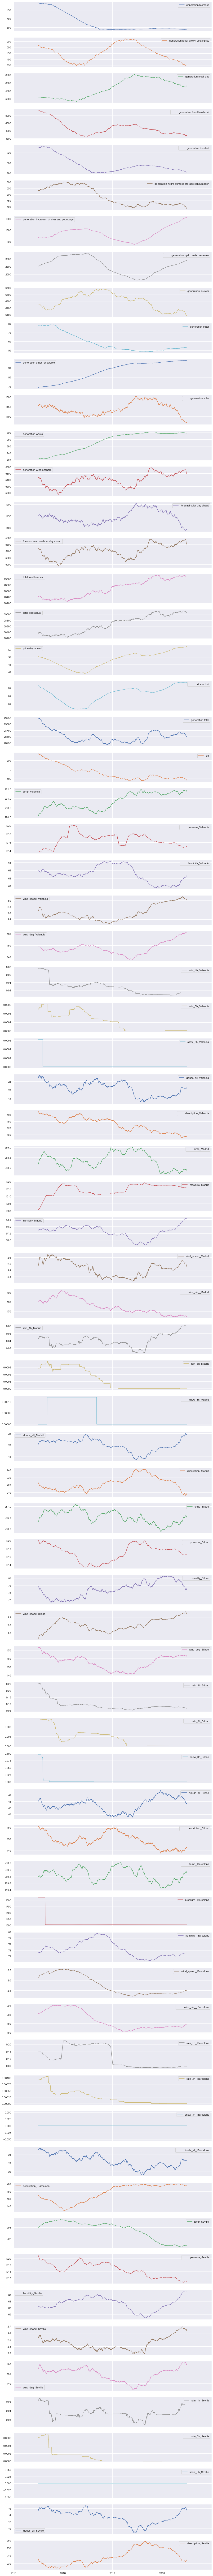

In [51]:
trends = pd.DataFrame(index=df.index)
for i, col in enumerate(df.columns):
    decomp = seasonal_decompose(df[col], period=8760)
    trends[col] = decomp.trend
trends.plot(subplots=True, figsize=(15,200));

In [53]:
energy.index[0]

Timestamp('2015-01-01 00:00:00')

In [57]:
energy

generation biomass  generation fossil brown coal/lignite  \
2015-01-01 00:00:00               447.0                                 329.0   
2015-01-01 01:00:00               449.0                                 328.0   
2015-01-01 02:00:00               448.0                                 323.0   
2015-01-01 03:00:00               438.0                                 254.0   
2015-01-01 04:00:00               428.0                                 187.0   
...                                 ...                                   ...   
2018-12-31 19:00:00               297.0                                   0.0   
2018-12-31 20:00:00               296.0                                   0.0   
2018-12-31 21:00:00               292.0                                   0.0   
2018-12-31 22:00:00               293.0                                   0.0   
2018-12-31 23:00:00               290.0                                   0.0   

                     generation fossil gas  generation fossil hard coal  \
2015-01-01 00:00:00                 4844.0                       4821.0   
2015-01-01 01:00:00                 5196.0                       4755.0   
2015-01-01 02:00:00                 4857.0                       4581.0   
2015-01-01 03:00:00                 4314.0                       4131.0   
2015-01-01 04:00:00                 4130.0                       3840.0   
...                                    ...                          ...   
2018-12-31 19:00:00                 7634.0                       2628.0   
2018-12-31 20:00:00                 7241.0                       2566.0   
2018-12-31 21:00:00                 7025.0                       2422.0   
2018-12-31 22:00:00                 6562.0                       2293.0   
2018-12-31 23:00:00                 6926.0                       2166.0   

                     generation fossil oil  \
2015-01-01 00:00:00                  162.0   
2015-01-01 01:00:00                  158.0   
2015-01-01 02:00:00                  157.0   
2015-01-01 03:00:00                  160.0   
2015-01-01 04:00:00                  156.0   
...                                    ...   
2018-12-31 19:00:00                  178.0   
2018-12-31 20:00:00                  174.0   
2018-12-31 21:00:00                  168.0   
2018-12-31 22:00:00                  163.0   
2018-12-31 23:00:00                  163.0   

                     generation hydro pumped storage consumption  \
2015-01-01 00:00:00                                        863.0   
2015-01-01 01:00:00                                        920.0   
2015-01-01 02:00:00                                       1164.0   
2015-01-01 03:00:00                                       1503.0   
2015-01-01 04:00:00                                       1826.0   
...                                                          ...   
2018-12-31 19:00:00                                          1.0   
2018-12-31 20:00:00                                          1.0   
2018-12-31 21:00:00                                         50.0   
2018-12-31 22:00:00                                        108.0   
2018-12-31 23:00:00                                        108.0   

                     generation hydro run-of-river and poundage  \
2015-01-01 00:00:00                                      1051.0   
2015-01-01 01:00:00                                      1009.0   
2015-01-01 02:00:00                                       973.0   
2015-01-01 03:00:00                                       949.0   
2015-01-01 04:00:00                                       953.0   
...                                                         ...   
2018-12-31 19:00:00                                      1135.0   
2018-12-31 20:00:00                                      1172.0   
2018-12-31 21:00:00                                      1148.0   
2018-12-31 22:00:00                                      1128.0   
2018-12-31 23:00:00                     

In [56]:
energy.loc['2015'and'2017']

generation biomass  generation fossil brown coal/lignite  \
2017-01-01 00:00:00               341.0                                 901.0   
2017-01-01 01:00:00               338.0                                 900.0   
2017-01-01 02:00:00               337.0                                 908.0   
2017-01-01 03:00:00               335.0                                 915.0   
2017-01-01 04:00:00               336.0                                 904.0   
...                                 ...                                   ...   
2017-12-31 19:00:00               273.0                                   0.0   
2017-12-31 20:00:00               267.0                                   0.0   
2017-12-31 21:00:00               268.0                                   0.0   
2017-12-31 22:00:00               277.0                                   0.0   
2017-12-31 23:00:00               278.0                                   0.0   

                     generation fossil gas  generation fossil hard coal  \
2017-01-01 00:00:00                 5412.0                       6157.0   
2017-01-01 01:00:00                 5401.0                       5959.0   
2017-01-01 02:00:00                 4753.0                       5723.0   
2017-01-01 03:00:00                 4321.0                       5523.0   
2017-01-01 04:00:00                 4320.0                       5295.0   
...                                    ...                          ...   
2017-12-31 19:00:00                 3101.0                        806.0   
2017-12-31 20:00:00                 3022.0                        764.0   
2017-12-31 21:00:00                 3205.0                        784.0   
2017-12-31 22:00:00                 3266.0                        791.0   
2017-12-31 23:00:00                 3552.0                        926.0   

                     generation fossil oil  \
2017-01-01 00:00:00                  175.0   
2017-01-01 01:00:00                  176.0   
2017-01-01 02:00:00                  175.0   
2017-01-01 03:00:00                  175.0   
2017-01-01 04:00:00                  175.0   
...                                    ...   
2017-12-31 19:00:00                  198.0   
2017-12-31 20:00:00                  196.0   
2017-12-31 21:00:00                  184.0   
2017-12-31 22:00:00                  195.0   
2017-12-31 23:00:00                  196.0   

                     generation hydro pumped storage consumption  \
2017-01-01 00:00:00                                        392.0   
2017-01-01 01:00:00                                        422.0   
2017-01-01 02:00:00                                        857.0   
2017-01-01 03:00:00                                       1146.0   
2017-01-01 04:00:00                                       1665.0   
...                                                          ...   
2017-12-31 19:00:00                                        311.0   
2017-12-31 20:00:00                                        769.0   
2017-12-31 21:00:00                                       1219.0   
2017-12-31 22:00:00                                       2252.0   
2017-12-31 23:00:00                                       2450.0   

                     generation hydro run-of-river and poundage  \
2017-01-01 00:00:00                                       542.0   
2017-01-01 01:00:00                                       504.0   
2017-01-01 02:00:00                                       478.0   
2017-01-01 03:00:00                                       465.0   
2017-01-01 04:00:00                                       462.0   
...                                                         ...   
2017-12-31 19:00:00                                      1119.0   
2017-12-31 20:00:00                                      1115.0   
2017-12-31 21:00:00                                      1121.0   
2017-12-31 22:00:00                                      1087.0   
2017-12-31 23:00:00                     

In [6]:
energy.loc[energy.price_forecast_tomorrow==energy.price_tomorrow, ['price_forecast_tomorrow', 'price_tomorrow']]

price_forecast_tomorrow  price_tomorrow
2018-01-09 10:00:00                    73.70           73.70
2018-06-08 23:00:00                    68.14           68.14

In [13]:
df.loc[df.price_forecast_tomorrow==df.price_tomorrow,['price_forecast_tomorrow', 'price_tomorrow']]

price_forecast_tomorrow  price_tomorrow
2018-01-09 10:00:00                    73.70           73.70
2018-06-08 23:00:00                    68.14           68.14
2019-02-01 00:00:00                    42.87           42.87
2019-02-01 01:00:00                    38.03           38.03
2019-02-01 02:00:00                    30.00           30.00
...                                      ...             ...
2021-05-12 19:00:00                    70.20           70.20
2021-05-12 20:00:00                    77.76           77.76
2021-05-12 21:00:00                    79.96           79.96
2021-05-12 22:00:00                    78.35           78.35
2021-05-12 23:00:00                    72.63           72.63

[13205 rows x 2 columns]